In [1]:
import pandas as pd

df = pd.read_csv('/content/IRIS.csv')

In [2]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.shape

(150, 5)

In [7]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

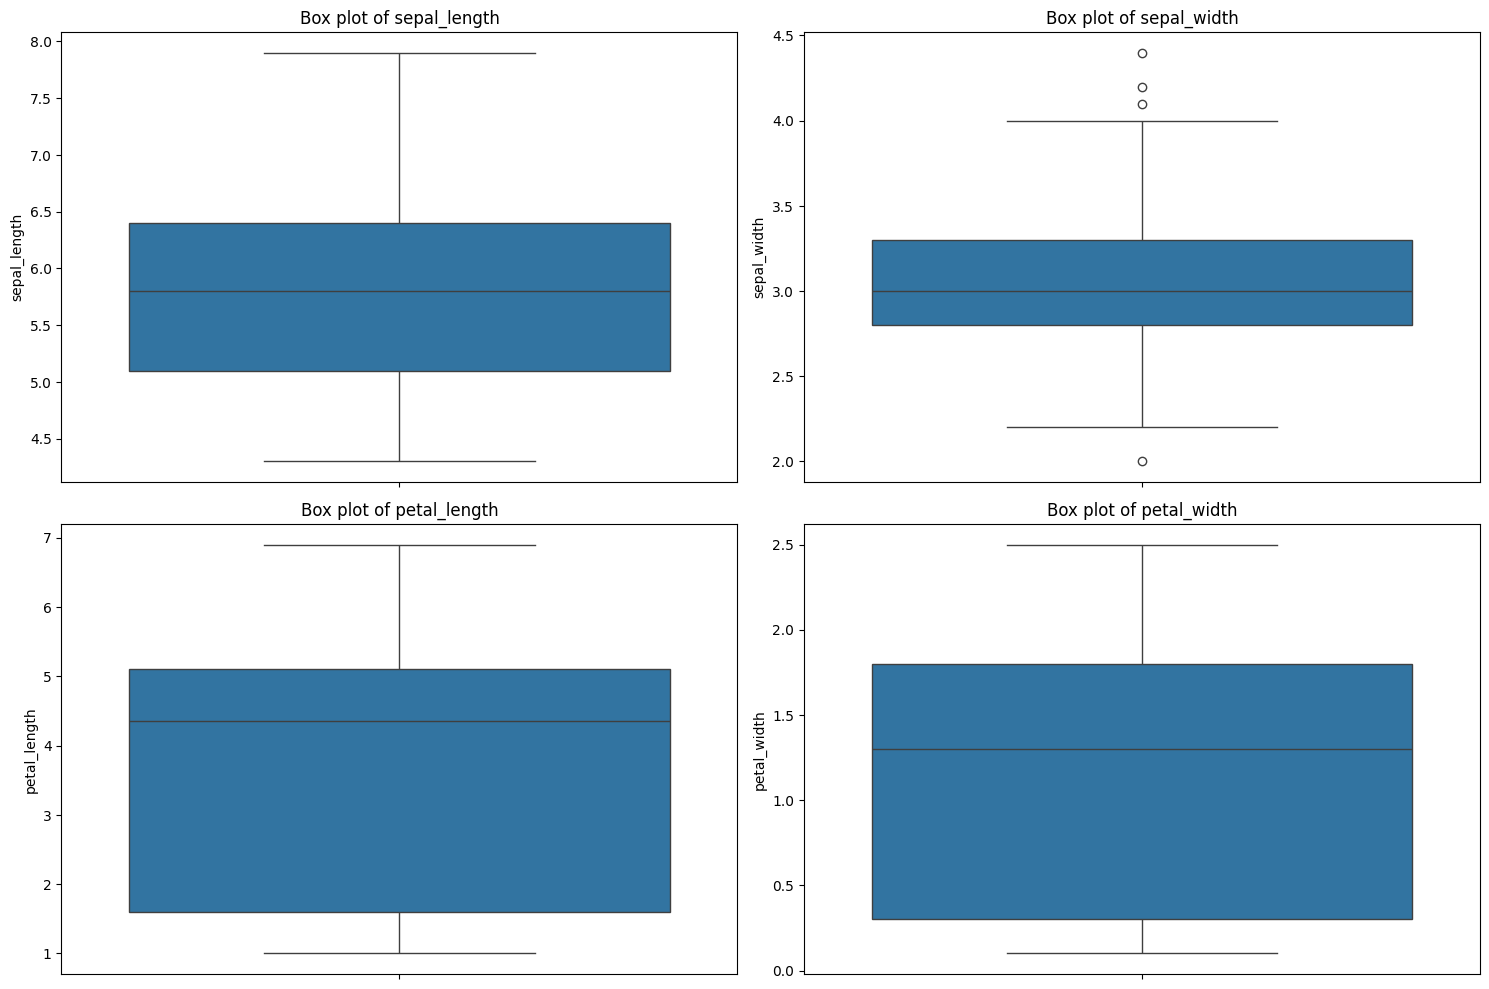

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualize outliers using box plots
plt.figure(figsize=(15, 10))

for i, column in enumerate(df.columns[:-1], 1):  # Exclude the species column
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box plot of {column}')

plt.tight_layout()
plt.show()

In [11]:
def remove_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[~((df[columns] < lower_bound) | (df[columns] > upper_bound)).any(axis=1)]

# Remove outliers
columns = df.columns[:-1]  # Exclude the species column
df_clean = remove_outliers(df, columns)

print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after removing outliers: {df_clean.shape}")

Original dataset shape: (150, 5)
Dataset shape after removing outliers: (146, 5)


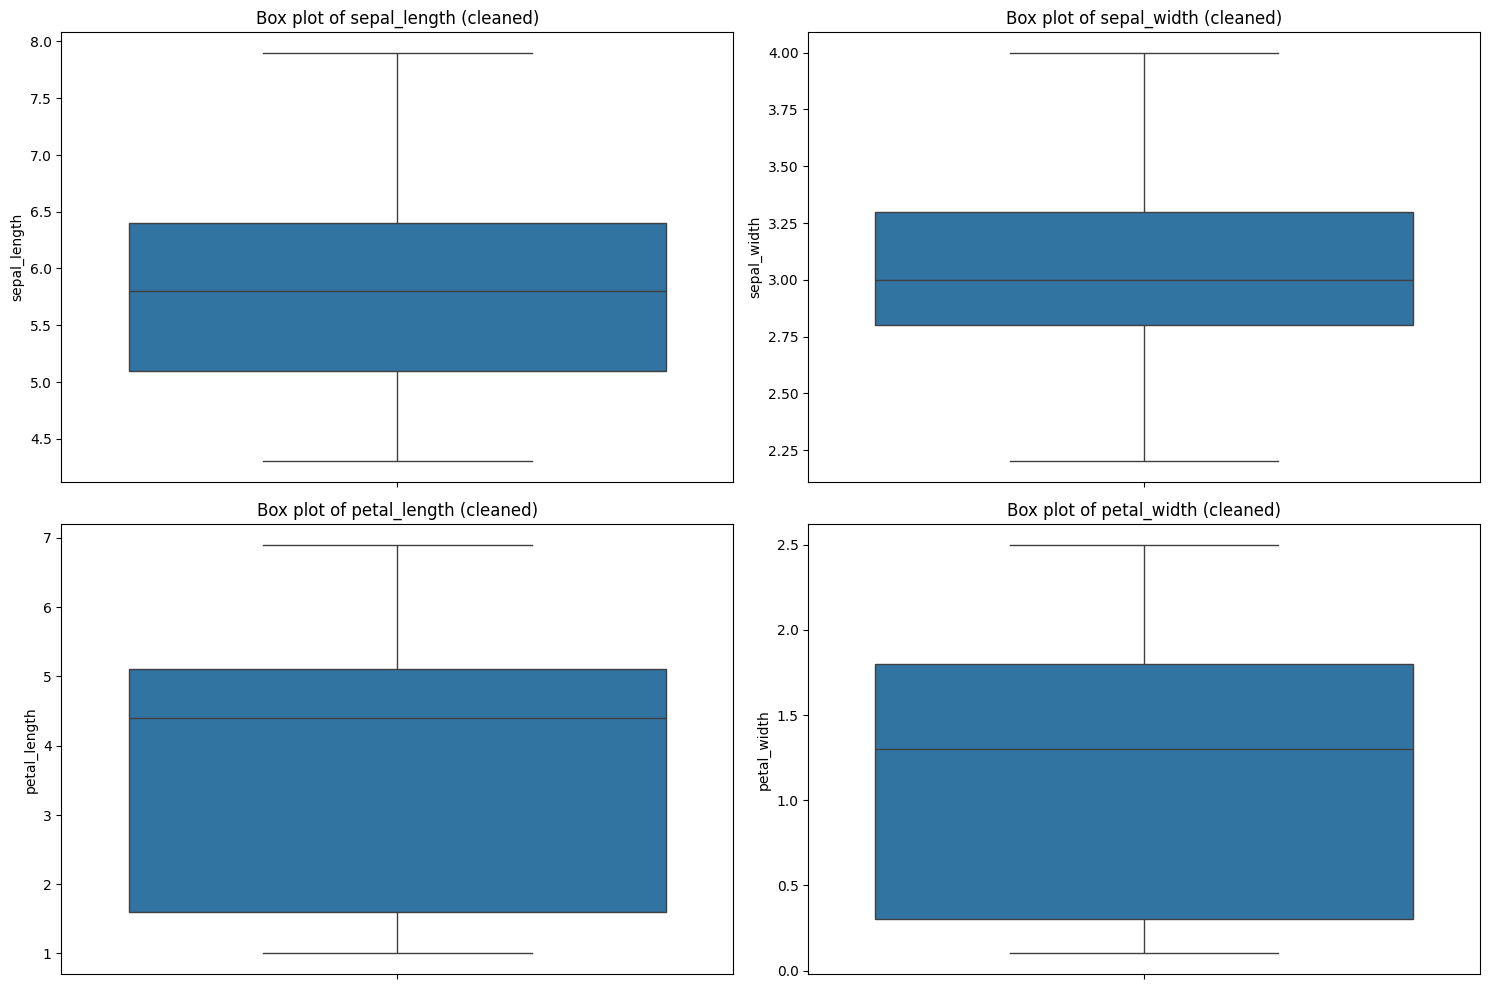

In [12]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(df_clean.columns[:-1], 1):  # Exclude the species column
    plt.subplot(2, 2, i)
    sns.boxplot(y=df_clean[column])
    plt.title(f'Box plot of {column} (cleaned)')

plt.tight_layout()
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['species'] = label_encoder.fit_transform(df['species'])

df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
